In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
# For PLotting we will use these library

import matplotlib.pyplot as plt

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Step 1: Data cleaning
data = yf.download(tickers='BTC-usd', start='2014-12-31', end='2022-12-31', interval='1d')
data.dropna(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
...,...,...,...,...,...,...
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920


In [3]:
# Step 2: Feature engineering
data['RSI']       = ta.rsi(data.Close, length=15)
data['EMA_short'] = ta.ema(data.Close, length=20)
data['EMA_long']  = ta.ema(data.Close, length=100)
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop([ 'Close'], axis=1, inplace=True)
# Setting the index
data.set_index('Date', inplace=True)
 pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

# Dropping any NaNs
data.dropna(inplace=True)

data.info()
data.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2823 entries, 2015-04-09 to 2022-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2823 non-null   float64
 1   High       2823 non-null   float64
 2   Low        2823 non-null   float64
 3   Adj Close  2823 non-null   float64
 4   Volume     2823 non-null   int64  
 5   RSI        2823 non-null   float64
 6   EMA_short  2823 non-null   float64
 7   EMA_long   2823 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 198.5 KB


,Open,High,Low,Adj Close,Volume,RSI,EMA_short,EMA_long
Date,,,,,,,,
2022-12-21,16904.527344,16916.800781,16755.912109,16817.535156,14882945045,46.354643,16990.208226,18631.716275
2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16441573050,46.537922,16974.982852,18596.045493
2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,15329265213,46.097985,16958.027640,18560.419901
2022-12-24,16796.976562,16864.703125,16793.527344,16847.755859,9744636213,46.916068,16947.525565,18526.505762
2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,11656379938,46.829585,16937.474209,18493.148941
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,11886957804,48.209222,16935.791398,18461.993610
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,15748580239,44.954914,16914.970677,18427.442723
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,17005713920,42.460302,16880.456542,18390.316575
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,14472237479,44.267447,16857.778948,18355.703213


In [5]:
data = data.to_csv('btc-2015-2022.csv')


AttributeError: 'NoneType' object has no attribute 'to_csv'

In [39]:
from datetime import datetime

def date_parser(date_str):
    date_obj = datetime.strptime(date_str, '%m/%d/%Y')
    return date_obj.strftime('%m-%d-%Y')


In [40]:
data_csv = pd.read_csv('btc-2015-2022.csv', parse_dates=['Date'], date_parser=date_parser)
data_csv.dropna(inplace=True)
# Setting the index

data_csv.set_index('Date', inplace=True)
# Dropping any NaNs
data_csv.dropna(inplace=True)
data_csv.info()
data_csv.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2823 entries, 2015-04-09 to 2022-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2823 non-null   float64
 1   High       2823 non-null   float64
 2   Low        2823 non-null   float64
 3   Adj Close  2823 non-null   float64
 4   Volume     2823 non-null   float64
 5   RSI        2823 non-null   float64
 6   EMA_short  2823 non-null   float64
 7   EMA_long   2823 non-null   float64
dtypes: float64(8)
memory usage: 198.5 KB


,Open,High,Low,Adj Close,Volume,RSI,EMA_short,EMA_long
Date,,,,,,,,
2022-12-21,16904.52734,16916.80078,16755.91211,16817.53516,1.488295e+10,46.354643,16990.20823,18631.71627
2022-12-22,16818.38086,16866.67383,16592.40820,16830.34180,1.644157e+10,46.537922,16974.98285,18596.04549
2022-12-23,16829.64453,16905.21875,16794.45898,16796.95313,1.532927e+10,46.097985,16958.02764,18560.41990
2022-12-24,16796.97656,16864.70313,16793.52734,16847.75586,9.744636e+09,46.916068,16947.52557,18526.50576
2022-12-25,16847.50586,16860.55469,16755.25391,16841.98633,1.165638e+10,46.829585,16937.47421,18493.14894
2022-12-26,16842.25000,16920.12305,16812.36914,16919.80469,1.188696e+10,48.209222,16935.79140,18461.99361
2022-12-27,16919.29102,16959.84570,16642.07227,16717.17383,1.574858e+10,44.954914,16914.97068,18427.44272
2022-12-28,16716.40039,16768.16992,16497.55664,16552.57227,1.700571e+10,42.460302,16880.45654,18390.31658
2022-12-29,16552.32227,16651.75586,16508.68359,16642.34180,1.447224e+10,44.267447,16857.77895,18355.70321


In [41]:
"""# Split data into training and testing sets using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]"""
    
# Split the data into training and test sets
train_data  = data_csv[:int(len(data_csv)*0.8)]
test_data = data_csv[int(len(data_csv)*0.8):]


In [42]:
train_x = train_data.index
train_y = train_data['Adj Close']
test_x = test_data.index
test_y = test_data['Adj Close']

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_x, y=train_y, name='Train Data'))
fig.add_trace(go.Scatter(x=test_x, y=test_y, name='Test Data'))

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price',
    title ='Train and Test Bitcoin Data',
    font_size=15,
    font_color='black',
    legend_title_text=' Parameters'
)

fig.show()

In [43]:
print ('Train shape',train_data.shape)
print ('test shape', test_data.shape)

Train shape (2258, 8)
test shape (565, 8)


In [44]:
train_df= train_data.copy()
test_df= test_data.copy()

In [45]:

scaler = MinMaxScaler()
train_data= scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)



In [46]:
def create_sequences1(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length ):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5
X_train, y_train = create_sequences1(train_data, sequence_length)
X_test, y_test = create_sequences1(test_data, sequence_length)
print("X_train" , X_train.shape)
print("y_train", y_train.shape)
print ("x_test",X_test.shape)
print ("y_test",y_test.shape)

X_train (2253, 5, 8)
y_train (2253, 8)
x_test (560, 5, 8)
y_test (560, 8)


In [16]:
# Normalize the data
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


In [17]:
train_data.shape

(2258, 8)

In [48]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(75, return_sequences=True, activation='relu'))
model.add(Dropout(0.25))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 100)            43600     
                                                                 
 dropout_8 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_9 (LSTM)               (None, 5, 100)            80400     
                                                                 
 dropout_9 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 75)             52800     
                                                                 
 dropout_10 (Dropout)        (None, 5, 75)             0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [49]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
71/71 [==============================] - 13s 31ms/step - loss: 0.0380 - accuracy: 0.6809 - mean_absolute_error: 0.1219
Epoch 2/1000
71/71 [==============================] - 2s 33ms/step - loss: 0.0116 - accuracy: 0.9277 - mean_absolute_error: 0.0719
Epoch 3/1000
71/71 [==============================] - 2s 31ms/step - loss: 0.0082 - accuracy: 0.9339 - mean_absolute_error: 0.0598
Epoch 4/1000
71/71 [==============================] - 2s 34ms/step - loss: 0.0067 - accuracy: 0.9299 - mean_absolute_error: 0.0521
Epoch 5/1000
71/71 [==============================] - 2s 32ms/step - loss: 0.0062 - accuracy: 0.9356 - mean_absolute_error: 0.0490
Epoch 6/1000
71/71 [==============================] - 2s 35ms/step - loss: 0.0052 - accuracy: 0.9334 - mean_absolute_error: 0.0443
Epoch 7/1000
71/71 [==============================] - 3s 35ms/step - loss: 0.0049 - accuracy: 0.9383 - mean_absolute_error: 0.0424
Epoch 8/1000
71/71 [==============================] - 3s 38ms/step - loss: 0.0049 

In [50]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history

    plt.figure(figsize=(16,5))
 
    plt.plot(history['mean_absolute_error'])
    plt.legend([ 'mean_absolute_error'])
    plt.title('mean_absolute_error')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.figure(figsize=(16,5))
 
    plt.plot(history['loss'])
    plt.legend([ 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(16,5))

    plt.plot(history['accuracy'])
    plt.legend([ 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()




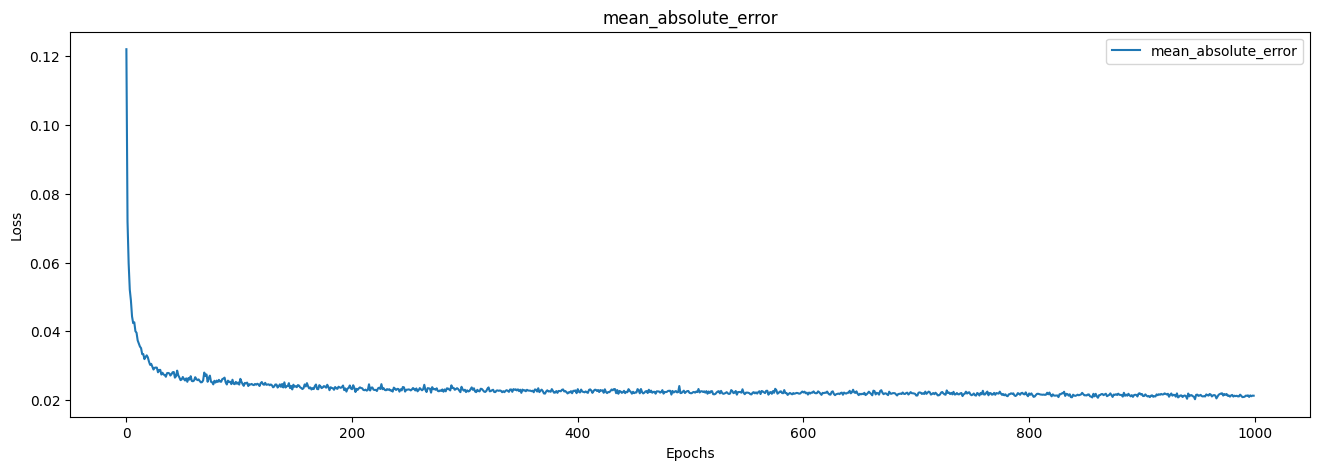

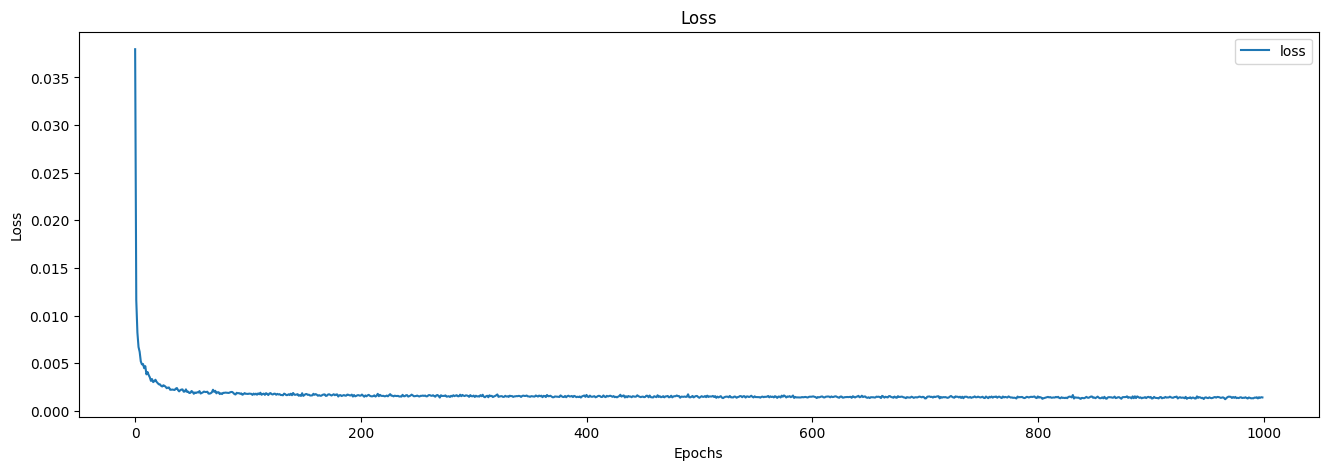

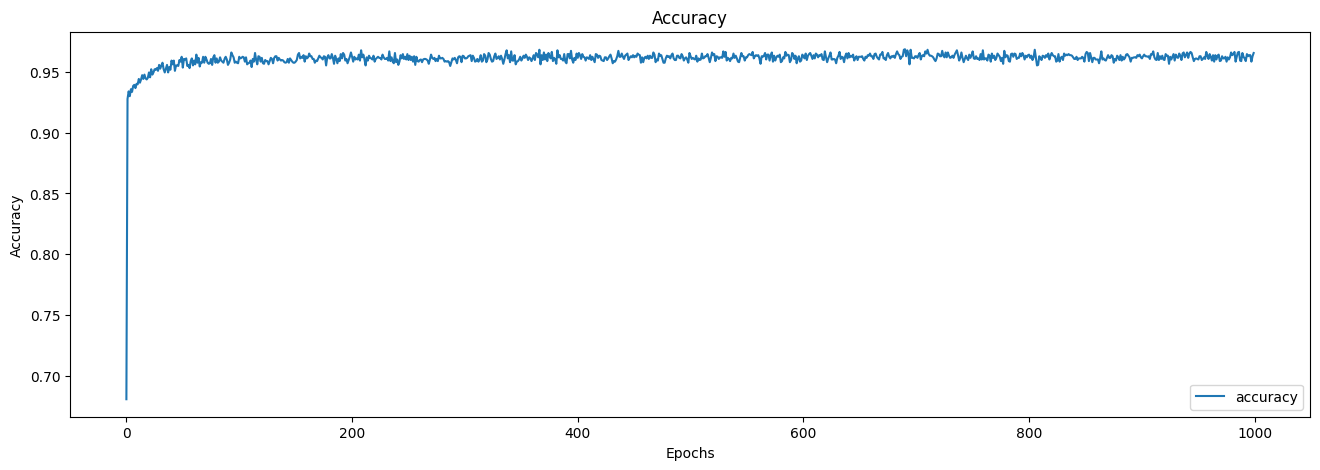

In [51]:
visualize_training_results(history)

In [52]:
mean_squared_error,accuracy ,mean_absolute_error = model.evaluate(X_test, y_test)


18/18 [==============================] - 3s 11ms/step - loss: 0.0056 - accuracy: 0.7196 - mean_absolute_error: 0.0608


In [55]:
# Make predictions on the test data
y_pred = model.predict(X_test)

18/18 [==============================] - 2s 12ms/step


In [56]:
print('y_pred',y_pred.shape)
print('y_test',y_test.shape)

y_pred (560, 8)
y_test (560, 8)


In [57]:
# convert to original data 
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [20]:
pred_df = pd.DataFrame(y_pred, columns=['Open','High','Low','Adj Close','Volume','RSI','EMA_short','EMA_long'], index=test_df.index)

# Create a new dataframe for last five days
y_test_df = pd.DataFrame(y_test, columns=test_df.columns, index=test_df.index)


ValueError: Shape of passed values is (592, 8), indices imply (597, 8)

In [35]:
y_pred

array([[33213.11    , 34259.645   , 31794.713   , ...,    44.219185,
        35444.25    , 39549.406   ],
       [32936.895   , 33976.56    , 31524.793   , ...,    44.192608,
        35176.363   , 39267.125   ],
       [33559.688   , 34605.75    , 32162.854   , ...,    45.257088,
        35550.594   , 39384.184   ],
       ...,
       [25395.697   , 26268.21    , 24515.414   , ...,    69.029884,
        23196.455   , 18781.46    ],
       [23901.555   , 24740.535   , 23036.848   , ...,    68.23281 ,
        21909.87    , 17899.086   ],
       [25553.727   , 26440.094   , 24650.031   , ...,    68.76122 ,
        23368.795   , 18906.465   ]], dtype=float32)

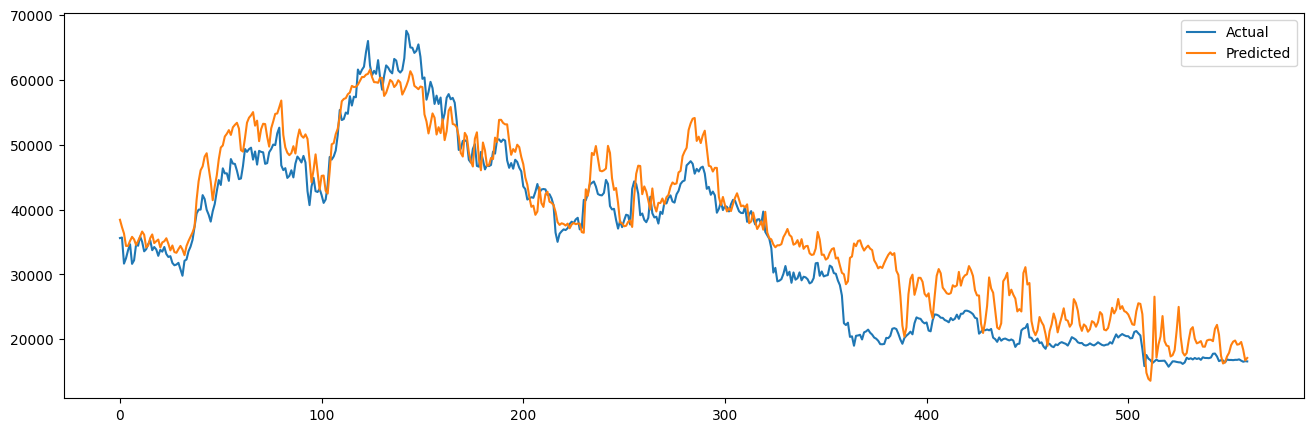

In [58]:
# Combine the two dataframes and plot the results

plt.figure(figsize=(16,5))
plt.plot(y_test[:,3], label="Actual")
plt.plot(y_pred[:,3], label="Predicted")
plt.legend()
plt.show()

In [25]:
# Compute the evaluation metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

MAPE: 15.94%
MSE: 48681820405469257728.00
RMSE: 6977235871.42
MAE: 2046702702.98


In [24]:
# Calculate the MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE:", rmse)

# Calculate the MSE (Mean Squared Error)
mse = np.mean((y_test - y_pred) ** 2)
print("MSE:", mse)

# Calculate the MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_test- y_pred))
print("MAE:", mae)


MAPE: 15.939885025221795
RMSE: 6977235871.422812
MSE: 4.868182040546926e+19
MAE: 2046702702.9767563


In [24]:
print( X_test.shape)

(596, 1, 8)


In [31]:
# Use the model to predict the next 10 days of Bitcoin prices
last_five_days = np.array([test_data[-30:]])
predictions = []
for i in range(10):
    prediction = model.predict(last_five_days)[0]
    predictions.append(prediction)
    last_five_days = np.append(last_five_days[:,1:,:],  [prediction[np.newaxis,:]], axis=1)


1/1 [==============================] - 0s 166ms/step


In [25]:
# Convert the predictions back to actual Bitcoin prices
predictions = np.array(predictions) * std.values + mean.values


NameError: name 'std' is not defined

In [ ]:
test_data= np.array(test_data) * std.values + mean.values

test_data

In [27]:
predictions=  scaler.inverse_transform(predictions)


In [28]:
predictions

array([[1.09961626e+04, 1.13115229e+04, 1.06252375e+04, 1.10520864e+04,
        2.50036518e+10, 6.81134556e+01, 8.75704581e+03, 6.53741578e+03],
       [9.72006856e+03, 9.97207057e+03, 9.43724313e+03, 9.76381589e+03,
        2.19188862e+10, 6.47506408e+01, 7.83818081e+03, 5.83819060e+03],
       [8.13433047e+03, 8.32255421e+03, 7.93410312e+03, 8.16668021e+03,
        1.88805708e+10, 6.18652877e+01, 6.60407758e+03, 4.98878174e+03],
       [7.00524118e+03, 7.14518674e+03, 6.86763155e+03, 7.02810438e+03,
        1.65712238e+10, 5.96265072e+01, 5.73940130e+03, 4.38543543e+03],
       [6.27532833e+03, 6.37997655e+03, 6.18357684e+03, 6.29012693e+03,
        1.48848898e+10, 5.79162224e+01, 5.20029355e+03, 3.99698177e+03],
       [5.89417977e+03, 5.97709664e+03, 5.83084990e+03, 5.90320870e+03,
        1.38476273e+10, 5.68402287e+01, 4.92670162e+03, 3.76310277e+03],
       [5.83906490e+03, 5.91365225e+03, 5.78701943e+03, 5.84489620e+03,
        1.34512386e+10, 5.64253839e+01, 4.89116644e+03, 3.

In [ ]:
# Create a new dataframe for predictions
preds_df = pd.DataFrame(predictions, columns=['Open','High','Low','Adj Close','Volume','RSI','EMA_short','EMA_long'], index=pd.date_range(start=test_data.index[-1], periods=10, freq="D"))

# Create a new dataframe for last five days
last_five_days_df = pd.DataFrame(last_five_days[0], columns=test_data.columns, index=pd.date_range(start=test_data.index[-30], periods=30, freq="D"))


preds_df

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
last_five_days_df

In [ ]:

# Combine the two dataframes and plot the results
combined_df = pd.concat([test_data, preds_df])
plt.figure(figsize=(16,5))
plt.plot(combined_df["Adj Close"], label="Actual")
plt.plot(combined_df["Adj Close"].iloc[-10:], label="Predicted")
plt.legend()
plt.show()
